In [ ]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files
import numpy as np



#Import the data, merge all the CSVs into one CSV to easily analyse the data

In [ ]:
# Merge 12 months data into a single file

#df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Data/Sales data/Sales_April_2019.csv')

#df.head()

# check all files in our sales data folder

files = [file for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/Python Data/Sales data')]
print(files)

# Now we concatenate all of them into a single csv

all_months_data =pd.DataFrame()

for file in files:
  df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Data/Sales data/' + file)
  all_months_data = pd.concat([all_months_data,df])

all_months_data.head()


['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# Download the newly created all months data dataframe as a csv

all_months_data.to_csv('all_months_data.csv', index=False)

#files.download('all_months_data.csv')


In [ ]:
#Read merged csv

all_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Data/all_months_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#Clean up the data

First we see how these NaNs look like

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]

nan_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


Now we can drop these NaNs

In [ ]:
all_data = all_data.dropna()

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Question 1 - What was the best the best month for sales and how much was earned that Month?

Starts with a lot of data processing <> Add Month column to the data

In [ ]:


all_data['Month'] = all_data['Order Date'].str[0:2]

all_data.head()



<ipython-input-7-37044fa3d2b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [ ]:
temp_df = all_data[all_data['Order Date'].str[0:2]== 'Or']
temp_df

#Remove all these in our all_data

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


Change month data type to Numeric

In [ ]:

all_data['Month']= all_data['Month'].astype(int)
all_data['Quantity Ordered']= all_data['Quantity Ordered'].astype(int)
all_data['Price Each']= all_data['Price Each'].astype(float)
all_data.head()

<ipython-input-9-0b72034ea2e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']= all_data['Month'].astype(int)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Add a sales column (Qty *price)

In [ ]:

all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Calculate sales for our best month

In [ ]:


results= all_data.groupby('Month').sum()    #['Sales']
results

<ipython-input-11-57fb67e1e5eb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results= all_data.groupby('Month').sum()    #['Sales']


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Visualize this on a bar chart


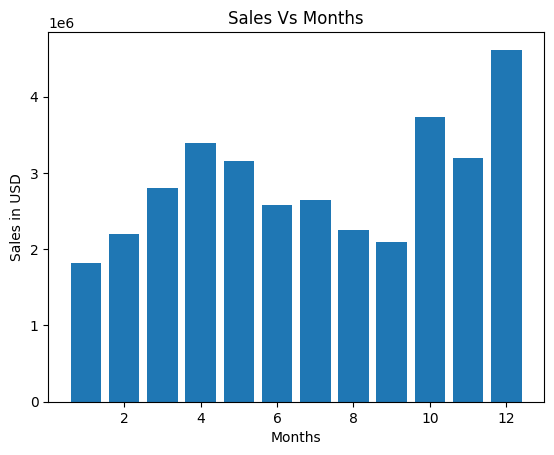

In [ ]:

Months = range(1,13)
Sales = results['Sales']

plt.bar(Months,Sales)
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.title('Sales Vs Months')
plt.show()

#Question 2: What was the best selling city of the year?

First we have to create a city column, we get this from the address column

In [ ]:
#all_data = all_data.iloc[:,:-2] # drops the last two columns that I had created that are irrelevant

#all_data[['Street','City','Postal Code']] = all_data['Purchase Address'].str.split(',', expand = True)
#all_data = all_data.drop(columns = 'Purchase Address')
# all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1]) #This creates the city column
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


Then we can answer our question of which city had the highest number of sales in the year

In [ ]:
city_sales = all_data.groupby('City').sum().reset_index()
city_sales= city_sales.sort_values(by = 'Sales', ascending = False)
city_sales

<ipython-input-14-7773a54c275e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_sales = all_data.groupby('City').sum().reset_index()


,City,Quantity Ordered,Price Each,Month,Sales
7,San Francisco,50239,8211461.74,315520,8262203.91
4,Los Angeles,33289,5421435.23,208325,5452570.80
5,New York City,27932,4635370.83,175741,4664317.43
2,Boston,22528,3637409.77,141112,3661642.01
0,Atlanta,16602,2779908.20,104794,2795498.58
3,Dallas,16730,2752627.82,104620,2767975.40
8,Seattle,16553,2733296.01,104941,2747755.48
6,Portland,14053,2307747.47,87765,2320490.61
1,Austin,11153,1809873.61,69829,1819581.75


Visualize this

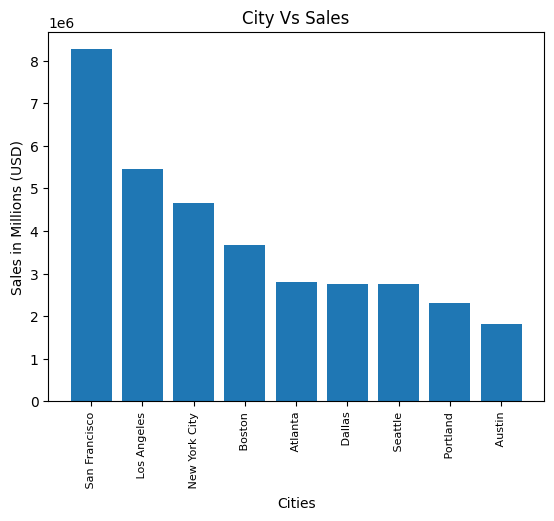

In [ ]:
Cities = city_sales['City'].unique()
Sales = city_sales['Sales']
plt.bar(Cities, city_sales['Sales'])
plt.ylabel('Sales in Millions (USD)')
plt.xlabel('Cities')
plt.title('City Vs Sales')
plt.xticks(Cities, rotation = 'vertical', size =8)
# plt.yscale('log')
plt.show()

###What time should we disblay advertisements to maximize likelihood of customer's buying a product?

In [ ]:
#Change order date format to datetime for easier date handling
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [ ]:
# We create a Hour column such that we can analyze by hour and minute

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


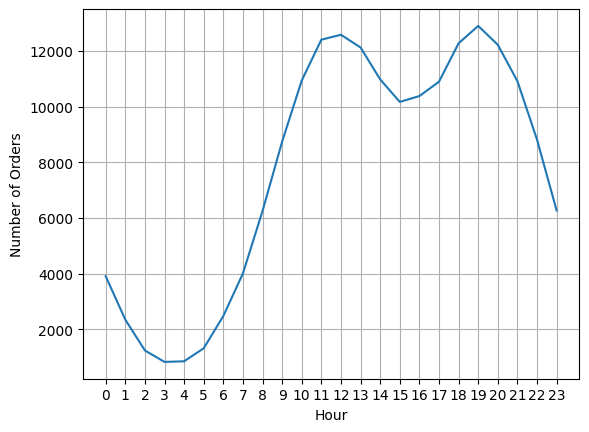

In [ ]:
#Visualize the chart

hours = sorted(all_data['Hour'].unique())
orders = all_data.groupby('Hour').count().reset_index()
plt.plot(hours,orders['Order ID'])
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(hours)
plt.grid()
plt.show()

##What products are most often sold together?


In [ ]:
#Have a look at the data

all_data.head()

#Fetch onlt the duplicated order ids, meaning the order had multiple items ordered

duplicated_orders = all_data[all_data['Order ID'].duplicated(keep =False)] # This will create a new df for only duplicated orders.

duplicated_orders.head()

# Create a column named "Grouped" to that will combine all products that were bought with in the same order ID

duplicated_orders['Grouped'] =duplicated_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicated_orders.head()

#Then we have to drop the duplocates created after grouping the products

duplicated_orders = duplicated_orders[['Order ID','Purchase Address','Grouped']].drop_duplicates()
duplicated_orders.head()


<ipython-input-19-3726e5c2c1c0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_orders['Grouped'] =duplicated_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Purchase Address,Grouped
3,176560,"669 Spruce St, Los Angeles, CA 90001","Google Phone,Wired Headphones"
18,176574,"20 Hill St, Los Angeles, CA 90001","Google Phone,USB-C Charging Cable"
30,176585,"823 Highland St, Boston, MA 02215","Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"365 Center St, San Francisco, CA 94016","AAA Batteries (4-pack),Google Phone"
119,176672,"778 Maple St, New York City, NY 10001","Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
# Now aggregate and see which grouped items appear most.

#df = duplicated_orders.groupby('Grouped').count().reset_index

#Remove duplicates

from itertools import combinations
from collections import Counter

count = Counter()

# Create a for loop to create various combinations and use counter to count those combinations

for row in duplicated_orders['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

print(count)

count.most_common(10)

#For readerbility we could go on and make it more readable

for key, value in count.most_common(10):
  print(key,value)


Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

###What product Sold the most and why do you think it sold the most?


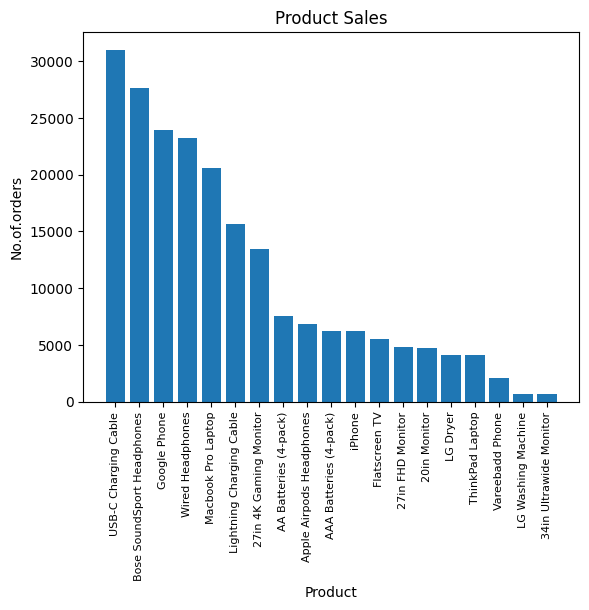

In [ ]:
all_data.head()

product = all_data['Product'].unique()
order_agg =all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

plt.bar(product, order_agg)
plt.ylabel('No.of.orders')
plt.xlabel('Product')
plt.title('Product Sales')
plt.xticks(product, rotation = 'vertical', size =8)
plt.show()

# sorted_orders =order_agg.sort_values(by = 'Order ID', ascending = False).rename(columns={'Order ID': 'No of orders'})
# sorted_orders


###We anticipate that the reason for some items having bigger sales than others is its because of their prices, here we shall try to see if there is a direct correlation between the price and quantity ordred


<ipython-input-35-6a627fcd75d9>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels('Product', rotation ='vertical', size = 8)


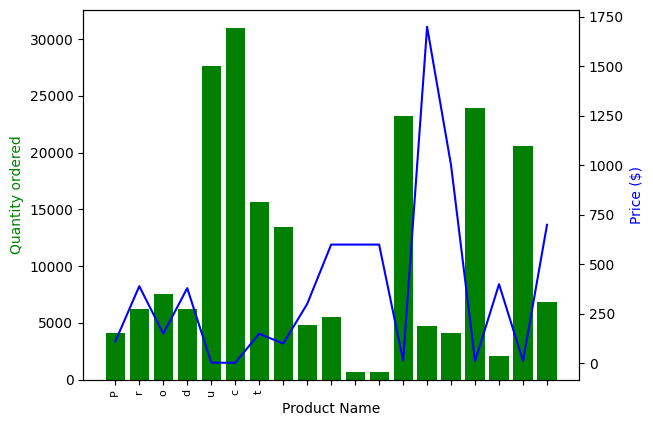

In [ ]:
all_data.head()
prices = all_data.groupby('Product')['Price Each'].mean()
prices

product = all_data['Product'].unique()
order_agg =all_data.groupby('Product')['Quantity Ordered'].sum() #.sort_values(ascending=False)

##Then we combine both charts one for sales and one for the prices. Because we have the same y axis (Product), we shall adda second x axis and have one chart

fig, ax1= plt.subplots()

ax2=ax1.twinx()
ax1.bar(product, order_agg, color = 'g')
ax2.plot(product, prices,'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity ordered', color ='g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels('Product', rotation ='vertical', size = 8)
plt.show()

